In [1]:
!pip install tensorflow matplotlib pillow


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from google.colab import files


In [3]:
model = mobilenet_v2.MobileNetV2(weights='imagenet')


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    print(f"Uploaded Image: {img_path}")


Saving cat.webp to cat.webp
Uploaded Image: cat.webp


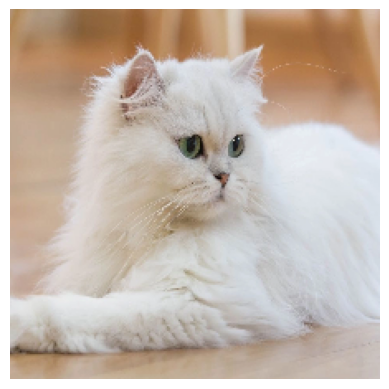

In [5]:
img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224 for MobileNetV2
plt.imshow(img)  # Display the image
plt.axis('off')
plt.show()
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [6]:
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Top Predictions:")
for i, (imagenet_id, label, confidence) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({confidence*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top Predictions:
1: Persian_cat (97.59%)
2: lynx (0.15%)
3: washbasin (0.11%)


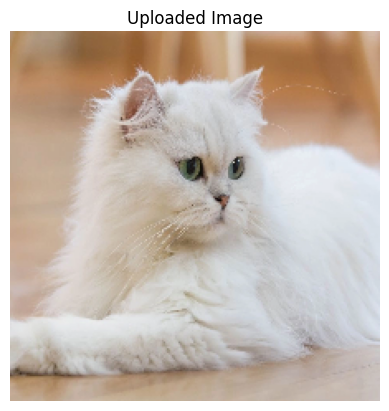

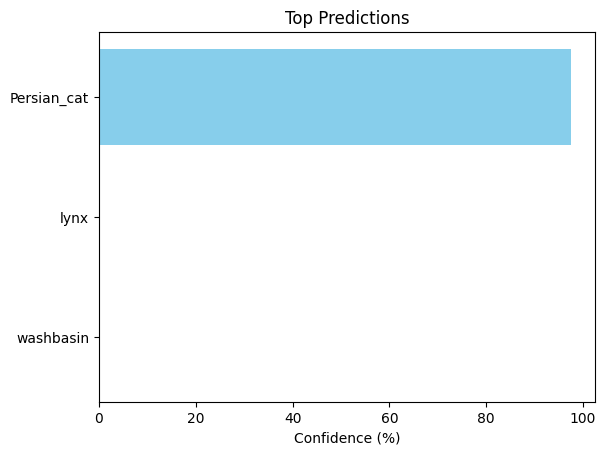

In [7]:
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()
labels = [label for (_, label, _) in decoded_predictions]
confidences = [confidence * 100 for (_, _, confidence) in decoded_predictions]
plt.barh(labels, confidences, color='skyblue')
plt.xlabel("Confidence (%)")
plt.title("Top Predictions")
plt.gca().invert_yaxis()
plt.show()
